# PREVISÃO DE VENDAS COM I.A.
Prever quanto a empresa irá ganhar de acordo com os investimentos em cada setor

## Lendo base de dados

In [3]:
import pandas as pd

df = pd.read_csv("advertising.csv")
display(df)
print(df.info())

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


## Análise exploratória
Analisar distribuição dos dados e correlações

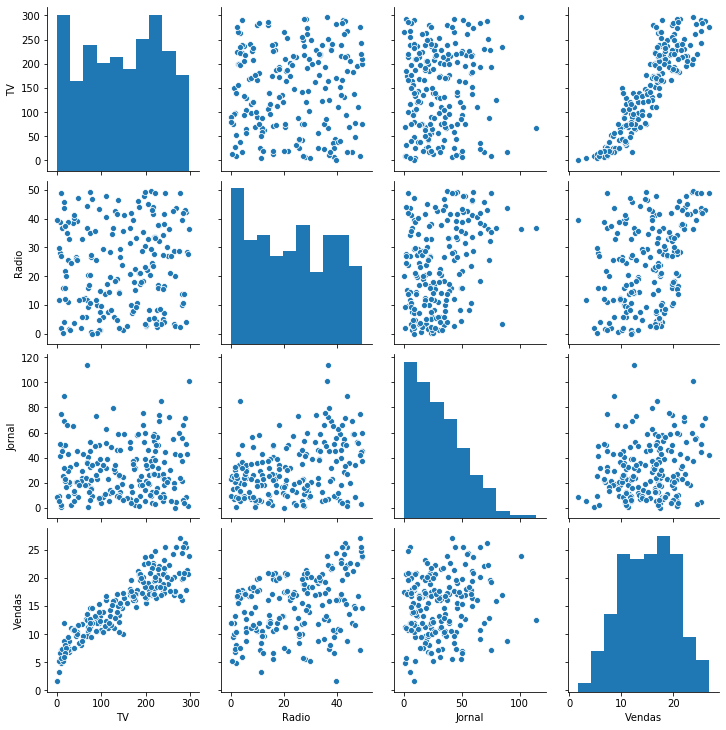

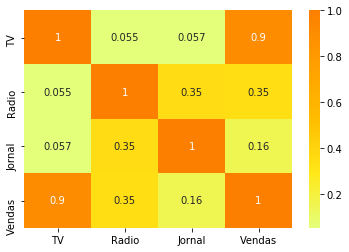

In [8]:
# Bibliotecas para exibição de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Exibe dados em gráficos
sns.pairplot(df)  
plt.show()

# Exibe correlação em gráfico de calor(Quanto mais proximo de 1 melhor a correlação)
sns.heatmap(df.corr(), cmap = "Wistia", annot=True)
plt.show()

 ## Iniciando modelo de Machine Learning
  - Serparação dos dados de treino e dados de teste

In [22]:
# Biblioteca que faz a separação dos dados
from sklearn.model_selection import train_test_split

# Valores usados para fazer a previsão
x = df.drop("Vendas", axis=1) # Todos os dados menos a coluna vendas

# Valores a serem calculados
y = df["Vendas"]

# Função que faz a separação dos dados
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3, random_state=1)


## Criando Inteligência Artificial
   - Regresão linear
   - RandomForest (Árvore de Decisão)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Crian inteligências
lr = LinearRegression()
rf = RandomForestRegressor()

# Treina inteligências
lr.fit(x_treino, y_treino)
rf.fit(x_treino, y_treino)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## Testando I.A. e avaliando o melhor modelo
   - Usando o R²: Mostra o % que o modelo consegue explicar o que acontece
   - Analisnado o MSE (Erro Quadrático Médio): Mostrastra o quanto o modelo 'erra' quando tenta fazer uma previsão

In [44]:
from sklearn import metrics
import numpy as np

teste_linear = lr.predict(x_teste)
teste_random = rf.predict(x_teste)

# Calcula o R^2 dos modelos
r2_linear = metrics.r2_score(y_teste, teste_linear) #Compara os valores corretos com os valores da previsão
r2_random = metrics.r2_score(y_teste, teste_random)
print("O R^2 do modelo Regressão Linear: %r" %(r2_linear))
print("O R^2 do modelo RandomForest: %r" %(r2_random))

# Calcula o erro dos modelos
erro_linear = metrics.mean_squared_error(y_teste, teste_linear)
erro_random = metrics.mean_squared_error(y_teste, teste_random)
print("\nErro quadrado do modelo Regressão Linear: %r" %(erro_linear))
print("Erro quadrado do modelo RandomForest: %r" %(erro_random))


O R^2 do modelo Regressão Linear: 0.9071151423684273
O R^2 do modelo RandomForest: 0.9645119619630731

Erro quadrado do modelo Regressão Linear: 2.370659971225657
Erro quadrado do modelo RandomForest: 0.9057458166666682


## Visualizar as previsões em gráficos

,Vendas Reais,Previsões
0,23.8,23.355
1,16.6,17.940
2,11.9,12.739
3,19.8,18.019
4,17.6,20.060
5,25.5,25.033
6,16.9,16.923
7,17.9,16.980
8,10.5,11.140
9,17.1,18.298


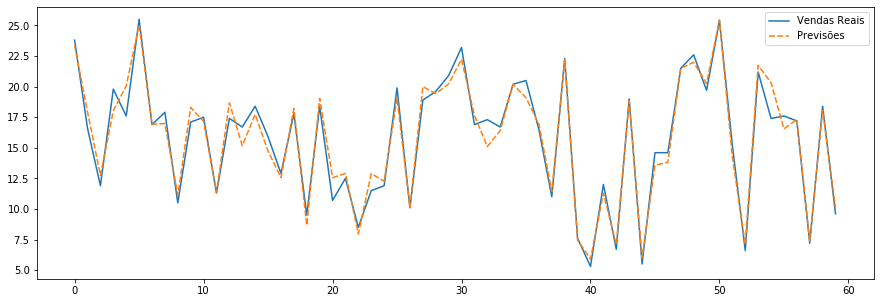

In [51]:
# Cria tabela vazia
comparacao = pd.DataFrame()

# Adiciona coluna com os valores para comparação
comparacao["Vendas Reais"] = y_teste
comparacao["Previsões"] = teste_random
comparacao = comparacao.reset_index(drop = True)
display(comparacao)

# Cria gráfico para vizualização
plt.figure(figsize=(15, 5)) # Altera o tamanho da imagem
sns.lineplot(data = comparacao)
plt.show()

## Verificando a importância de cada variável para as vendas

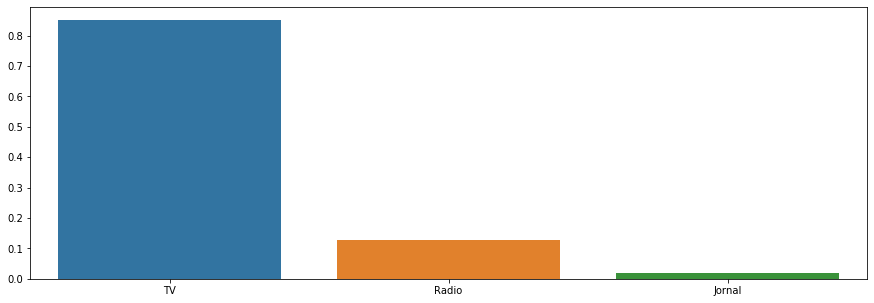

In [52]:
plt.figure(figsize=(15, 5))
sns.barplot(x=x_treino.columns, y=rf_reg.feature_importances_)
plt.show()